In [54]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [55]:
chips=pd.read_excel("QVI_transaction_data.xlsx")
chips_demograph=pd.read_csv("QVI_purchase_behaviour.csv")

In [56]:
# Clean the 'Date' column by converting non-numeric values to NaN
chips['DATE'] = pd.to_numeric(chips['DATE'], errors='coerce')


In [57]:
# Convert the cleaned numeric dates to actual datetime format
chips['DATE'] = pd.to_datetime(chips['DATE'], unit='D', origin='1899-12-30', errors='coerce')

In [58]:
chips['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [59]:
# Exploring dataset

chips



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [60]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [61]:
chips_demograph

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [62]:
chips_demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [63]:
# exploring different columns

chips_demograph['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [64]:
chips_demograph['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [65]:
chips["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [66]:
chips["WEIGHT"] =chips["PROD_NAME"].str[-4:] # takes the last four characters from the product_name & create a new column in the DF
chips["WEIGHT"]

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: WEIGHT, Length: 264836, dtype: object

In [67]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g


In [68]:
chips["WEIGHT"].value_counts()

WEIGHT
175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: count, dtype: int64

In [69]:
chips["WEIGHT"]=chips["WEIGHT"].replace({"Salt":"135g", "210G":"210g", "150G":"150g", "175G":"175g"})

In [70]:
chips["WEIGHT"].value_counts()

WEIGHT
175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: count, dtype: int64

In [71]:
chips["PROD_NAME"]=chips["PROD_NAME"].str.strip() #.str() --> to confirm its working on String data type
                                                   #  .strip() ---> to remove white space


In [72]:
# removing others other than chips

index_drop=chips[chips["PROD_NAME"] == "Old El Paso Salsa"].index

chips=chips.drop(index_drop)

In [73]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g


In [74]:
chips[chips["PROD_NAME"]=="Old El Paso Salsa"].count()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
dtype: int64

In [75]:
# creating Brand column

chips["BRAND"] = chips["PROD_NAME"].str.split().str.get(0)  # .str.split() ---->Splits each product name in column into a list 
                                                                          # -->of words based on whitespace
                                                            # .str.get(0)  -----> Extracts the first word (index 0) from each list of words, 
                                                             #               ----->which is  the brand name.
chips["BRAND"].value_counts()

BRAND
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [76]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos


In [77]:
# checking the date column
chips["DATE"].unique()

<DatetimeArray>
['2018-10-17 00:00:00', '2019-05-14 00:00:00', '2019-05-20 00:00:00',
 '2018-08-17 00:00:00', '2018-08-18 00:00:00', '2019-05-19 00:00:00',
 '2019-05-16 00:00:00', '2018-08-20 00:00:00', '2019-05-17 00:00:00',
 '2019-05-18 00:00:00',
 ...
 '2019-01-23 00:00:00', '2019-04-22 00:00:00', '2019-06-14 00:00:00',
 '2019-01-11 00:00:00', '2018-09-03 00:00:00', '2018-11-21 00:00:00',
 '2019-05-10 00:00:00', '2018-12-08 00:00:00', '2019-01-30 00:00:00',
 '2019-02-09 00:00:00']
Length: 364, dtype: datetime64[ns]

In [78]:
pd.options.display.max_rows = 100000

In [79]:
type(chips["DATE"])

pandas.core.series.Series

In [80]:
chips["DATE"].value_counts()

DATE
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
2018-12-20    855
2018-12-21    842
2019-06-07    807
2018-09-06    791
2018-11-20    788
2018-12-17    786
2019-04-20    785
2019-06-14    784
2019-06-15    781
2019-05-19    779
2018-09-25    778
2018-09-23    778
2019-03-22    775
2018-10-09    774
2018-11-11    774
2019-03-05    774
2018-10-26    771
2018-11-19    770
2018-09-04    769
2019-06-09    769
2019-04-24    768
2019-03-17    765
2018-09-18    764
2018-08-15    764
2019-02-08    763
2019-03-15    763
2019-05-06    762
2018-07-06    762
2019-06-12    762
2019-03-12    762
2018-12-16    761
2018-09-09    761
2018-11-10    761
2019-05-29    761
2018-08-06    760
2018-07-12    760
2018-07-13    760
2018-08-13    760
2019-04-03    759
2019-04-04    759
2019-05-14    758
2018-07-15    758
2018-11-09    758
2019-02-03    758
2018-08-05    757
2019-02-25    756
2018-11-23    755
2019-05-20    755
2019-04-21    754
2018-08-14    754
2019-

In [81]:
chip_sales_dates=chips.sort_values(by='DATE')
chip_sales_dates['DATE'].unique()

<DatetimeArray>
['2018-07-01 00:00:00', '2018-07-02 00:00:00', '2018-07-03 00:00:00',
 '2018-07-04 00:00:00', '2018-07-05 00:00:00', '2018-07-06 00:00:00',
 '2018-07-07 00:00:00', '2018-07-08 00:00:00', '2018-07-09 00:00:00',
 '2018-07-10 00:00:00',
 ...
 '2019-06-21 00:00:00', '2019-06-22 00:00:00', '2019-06-23 00:00:00',
 '2019-06-24 00:00:00', '2019-06-25 00:00:00', '2019-06-26 00:00:00',
 '2019-06-27 00:00:00', '2019-06-28 00:00:00', '2019-06-29 00:00:00',
 '2019-06-30 00:00:00']
Length: 364, dtype: datetime64[ns]

In [82]:
# adding the missing data and creating a datetime colum without the timestamp

chips['SHORT_DATE'] = pd.to_datetime(chips['DATE']).dt.strftime('%Y-%m-%d')

chips_christmas={"SHORT_DATE": "2018-12-25"}

chips=pd.concat([chips,pd.DataFrame([chips_christmas])], ignore_index=True)

chips["SHORT_DATE"].value_counts(dropna=False)

SHORT_DATE
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
2018-12-20    855
2018-12-21    842
2019-06-07    807
2018-09-06    791
2018-11-20    788
2018-12-17    786
2019-04-20    785
2019-06-14    784
2019-06-15    781
2019-05-19    779
2018-09-25    778
2018-09-23    778
2019-03-22    775
2018-10-09    774
2018-11-11    774
2019-03-05    774
2018-10-26    771
2018-11-19    770
2018-09-04    769
2019-06-09    769
2019-04-24    768
2019-03-17    765
2018-09-18    764
2018-08-15    764
2019-02-08    763
2019-03-15    763
2019-05-06    762
2018-07-06    762
2019-06-12    762
2019-03-12    762
2018-12-16    761
2018-09-09    761
2018-11-10    761
2019-05-29    761
2018-08-06    760
2018-07-12    760
2018-07-13    760
2018-08-13    760
2019-04-03    759
2019-04-04    759
2019-05-14    758
2018-07-15    758
2018-11-09    758
2019-02-03    758
2018-08-05    757
2019-02-25    756
2018-11-23    755
2019-05-20    755
2019-04-21    754
2018-08-14    754

In [83]:
# rrd brand is Red brand merging the two.

chips["BRAND"]=chips["BRAND"].replace({"RRD":"RED"})
chips["BRAND"].value_counts()

BRAND
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RED           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [84]:
# correcting the in correct brand name 

chips["BRAND"] = chips["BRAND"].replace({"Dorito":"Doritos", "Smith":"Smiths", "Infzns":"Infuzions"})

chips["BRAND"].value_counts()

BRAND
Kettle        41288
Smiths        31823
Doritos       28147
Pringles      25102
Infuzions     14201
Thins         14075
RED           11894
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [85]:
chips


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175g,Natural,2018-10-17
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175g,CCs,2019-05-14
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170g,Smiths,2019-05-20
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175g,Smiths,2018-08-17
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150g,Kettle,2018-08-18
...,...,...,...,...,...,...,...,...,...,...,...
264832,2018-08-13,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.4,175g,Tostitos,2018-08-13
264833,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,170g,Doritos,2018-11-06
264834,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,150g,Doritos,2018-12-27
264835,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,8.8,175g,Tostitos,2018-09-22


<Axes: >

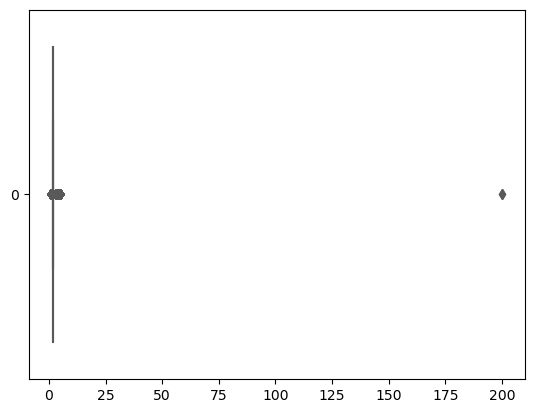

In [86]:
# checking outliers for PROD_QTY


sns.boxplot(data=chips.PROD_QTY, orient="h", palette="Set2")

# No outliers found




<Axes: title={'center': 'TOT_SALES'}, xlabel='PROD_QTY'>

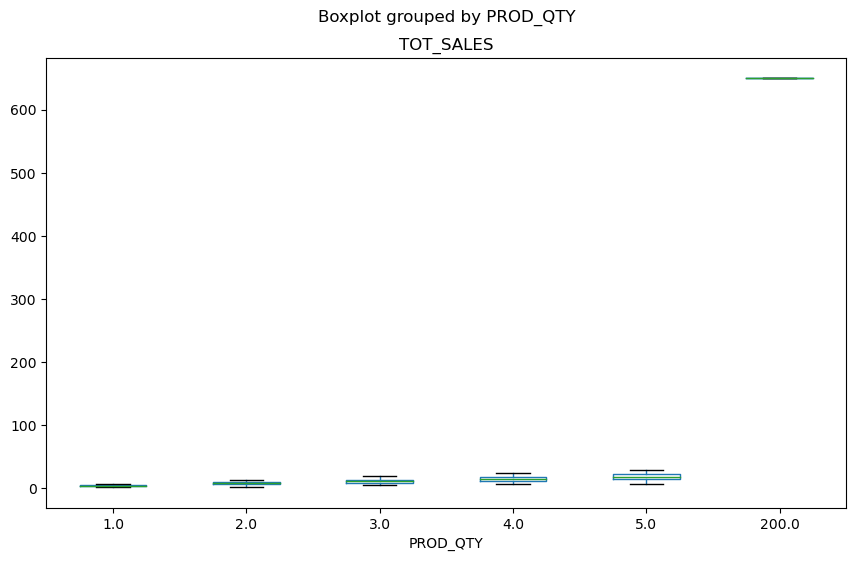

In [87]:
chips.boxplot(by ='PROD_QTY', column =['TOT_SALES'], grid = False,figsize=(10,6))  # checking for outliers in PROD_QTY & TOT_SALES

Only 2 transactions of 200 product quantity by a user, purchasing once a year!

We can safely remove these 2 transactions as outliers.

In [89]:
chips[chips["LYLTY_CARD_NBR"] ==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
69762,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2018-08-19
69763,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2019-05-20


In [90]:
# removing the outlier

chips= chips.drop([69762,69763])  # Purpose: This line removes rows with indices 69762 and 69763 from the chips DataFrame.

chips=chips.reset_index(drop=True)  # Purpose: This resets the index of the chips DataFrame after the rows were dropped. 
                                                     # The drop=True argument ensures the old index is not added as a column in the DataFrame.


In [91]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175g,Natural,2018-10-17
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175g,CCs,2019-05-14
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170g,Smiths,2019-05-20
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175g,Smiths,2018-08-17
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150g,Kettle,2018-08-18
...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-08-13,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.4,175g,Tostitos,2018-08-13
264831,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,170g,Doritos,2018-11-06
264832,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,150g,Doritos,2018-12-27
264833,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,8.8,175g,Tostitos,2018-09-22


In [92]:
chips[chips["LYLTY_CARD_NBR"] ==226000] # confirming the removal

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE


In [93]:
# merging  both dataetss

chips_merged=pd.merge(chips,chips_dem,on="LYLTY_CARD_NBR", how='left')
chips_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175g,Natural,2018-10-17,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175g,CCs,2019-05-14,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170g,Smiths,2019-05-20,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175g,Smiths,2018-08-17,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150g,Kettle,2018-08-18,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-08-13,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.4,175g,Tostitos,2018-08-13,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,170g,Doritos,2018-11-06,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,150g,Doritos,2018-12-27,YOUNG SINGLES/COUPLES,Premium
264833,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,8.8,175g,Tostitos,2018-09-22,YOUNG SINGLES/COUPLES,Premium


In [94]:
chips_final= chips_merged[["SHORT_DATE", "STORE_NBR", "LYLTY_CARD_NBR","TXN_ID","LIFESTAGE","PREMIUM_CUSTOMER","PROD_NBR","BRAND","PROD_NAME","WEIGHT","PROD_QTY","TOT_SALES"]]

In [95]:
chips_final


,SHORT_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,BRAND,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
0,2018-10-17,1.0,1000.0,1.0,YOUNG SINGLES/COUPLES,Premium,5.0,Natural,Natural Chip Compny SeaSalt175g,175g,2.0,6.0
1,2019-05-14,1.0,1307.0,348.0,MIDAGE SINGLES/COUPLES,Budget,66.0,CCs,CCs Nacho Cheese 175g,175g,3.0,6.3
2,2019-05-20,1.0,1343.0,383.0,MIDAGE SINGLES/COUPLES,Budget,61.0,Smiths,Smiths Crinkle Cut Chips Chicken 170g,170g,2.0,2.9
3,2018-08-17,2.0,2373.0,974.0,MIDAGE SINGLES/COUPLES,Budget,69.0,Smiths,Smiths Chip Thinly S/Cream&Onion 175g,175g,5.0,15.0
4,2018-08-18,2.0,2426.0,1038.0,MIDAGE SINGLES/COUPLES,Budget,108.0,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150g,3.0,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-08-13,272.0,272358.0,270154.0,YOUNG SINGLES/COUPLES,Premium,74.0,Tostitos,Tostitos Splash Of Lime 175g,175g,1.0,4.4
264831,2018-11-06,272.0,272379.0,270187.0,YOUNG SINGLES/COUPLES,Premium,51.0,Doritos,Doritos Mexicana 170g,170g,2.0,8.8
264832,2018-12-27,272.0,272379.0,270188.0,YOUNG SINGLES/COUPLES,Premium,42.0,Doritos,Doritos Corn Chip Mexican Jalapeno 150g,150g,2.0,7.8
264833,2018-09-22,272.0,272380.0,270189.0,YOUNG SINGLES/COUPLES,Premium,74.0,Tostitos,Tostitos Splash Of Lime 175g,175g,2.0,8.8


In [96]:
# saving the csv

chips_final.to_csv('chips_final.csv')

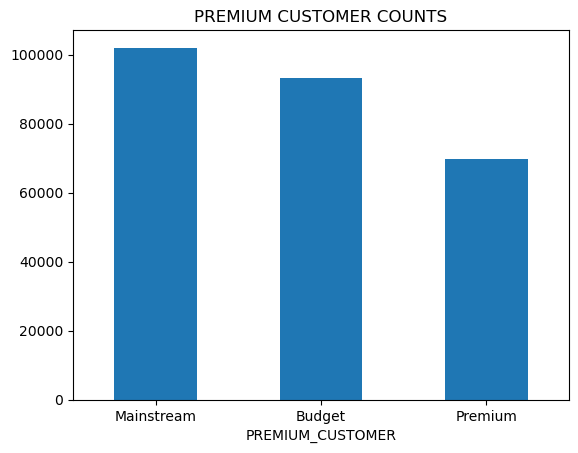

In [97]:
# EDA

pc_vc=chips_final["PREMIUM_CUSTOMER"].value_counts()
pc_vc.plot(kind="bar")
plt.xticks(rotation=360)
plt.title("PREMIUM CUSTOMER COUNTS")
plt.show()

In [98]:
# creating a dataset of just unique member numbers and counting the unique members by premium customer type
unique_members=chips_final.drop_duplicates(subset="LYLTY_CARD_NBR")
unique_members["PREMIUM_CUSTOMER"].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18921
Name: count, dtype: int64

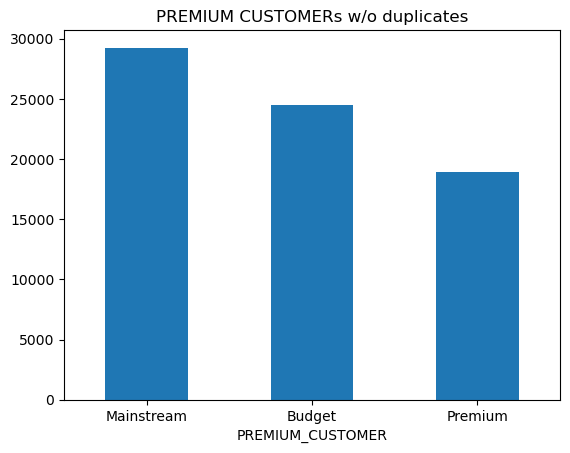

In [99]:
um_pc = unique_members["PREMIUM_CUSTOMER"].value_counts()

um_pc.plot(kind="bar")
plt.xticks(rotation=360)
plt.title("PREMIUM CUSTOMERs w/o duplicates")
plt.show()



In [100]:
# viewing the lifestage customer segment
unique_members["LIFESTAGE"].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

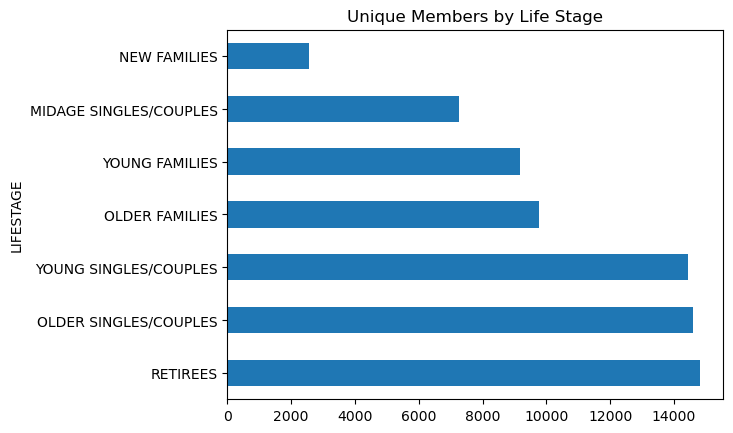

In [101]:
um_ls=unique_members["LIFESTAGE"].value_counts()

um_ls.plot(kind='barh')
plt.xticks(rotation=360)
plt.title("Unique Members by Life Stage")
plt.show()

In [102]:
#grouping by brand
chips_br= chips_final.groupby("BRAND")

In [103]:
#total of the sales for each brand

chip_sales_brand=chips_br["TOT_SALES"].sum()

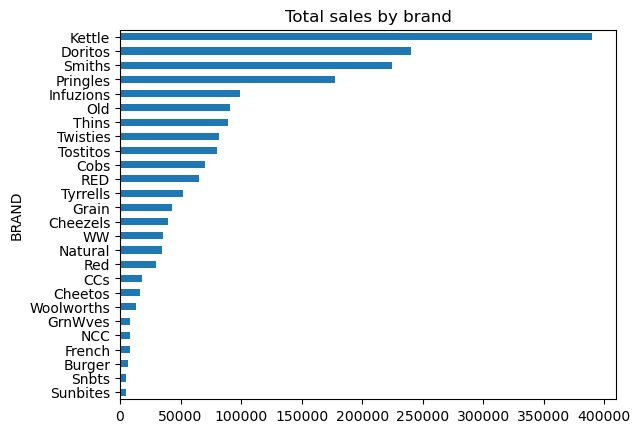

In [104]:
chip_sales_brand.sort_values().plot(kind='barh')
plt.title("Total sales by brand")
plt.show()

In [105]:
chips_mbr=chips_final.groupby("LYLTY_CARD_NBR")
chip_sales_mbr=chips_mbr["TOT_SALES"].sum()


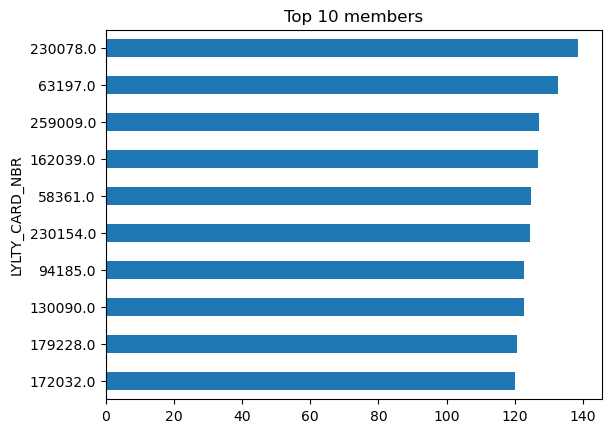

In [106]:
chip_sorted=chip_sales_mbr.sort_values()

chip_sorted.tail(10).plot(kind='barh')
plt.title("Top 10 members")
plt.show()

In [107]:
# top_ten=chip_sorted.tail(10)
# top_ten

In [108]:
top_ten=[230078,63197,259009,162039,58361,230154,94185,130090,179228,172032]


In [109]:
top_ten_members=chips_final[chips_final["LYLTY_CARD_NBR"].isin(top_ten)]
top_ten_grouped=top_ten_members.groupby("LYLTY_CARD_NBR")
top_ten_grouped['LIFESTAGE'].value_counts()

LYLTY_CARD_NBR  LIFESTAGE            
58361.0         YOUNG FAMILIES           14
63197.0         OLDER FAMILIES           15
94185.0         YOUNG FAMILIES           16
130090.0        YOUNG FAMILIES           14
162039.0        OLDER FAMILIES           18
172032.0        YOUNG SINGLES/COUPLES    18
179228.0        YOUNG FAMILIES           16
230078.0        OLDER FAMILIES           17
230154.0        OLDER FAMILIES           14
259009.0        OLDER SINGLES/COUPLES    15
Name: count, dtype: int64

In [110]:
top_ten_grouped["PREMIUM_CUSTOMER"].value_counts()

LYLTY_CARD_NBR  PREMIUM_CUSTOMER
58361.0         Budget              14
63197.0         Budget              15
94185.0         Premium             16
130090.0        Budget              14
162039.0        Mainstream          18
172032.0        Mainstream          18
179228.0        Budget              16
230078.0        Budget              17
230154.0        Budget              14
259009.0        Mainstream          15
Name: count, dtype: int64

In [111]:
chip_sorted.describe()

count    72636.000000
mean        26.613731
std         20.271119
min          1.500000
25%          9.100000
50%         21.700000
75%         40.000000
max        138.600000
Name: TOT_SALES, dtype: float64

In [112]:
# grouping by lifestage and extracting total sales

chips_ls=chips_final.groupby("LIFESTAGE")

chips_ls_sales=chips_ls["TOT_SALES"].sum()

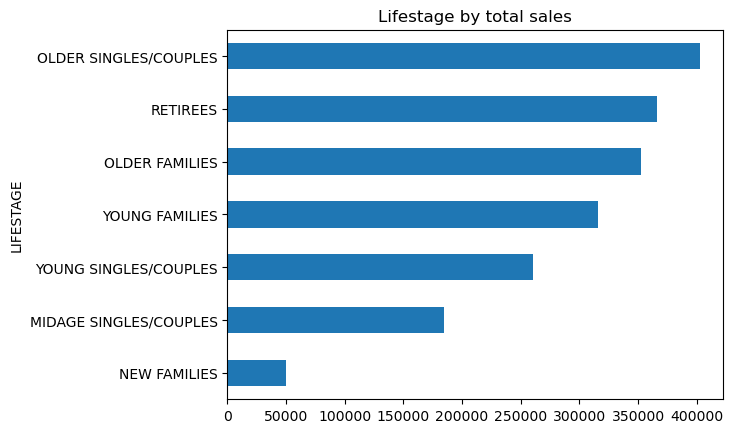

In [113]:
chips_ls_sales.sort_values().plot(kind='barh')
plt.title("Lifestage by total sales")
plt.show()

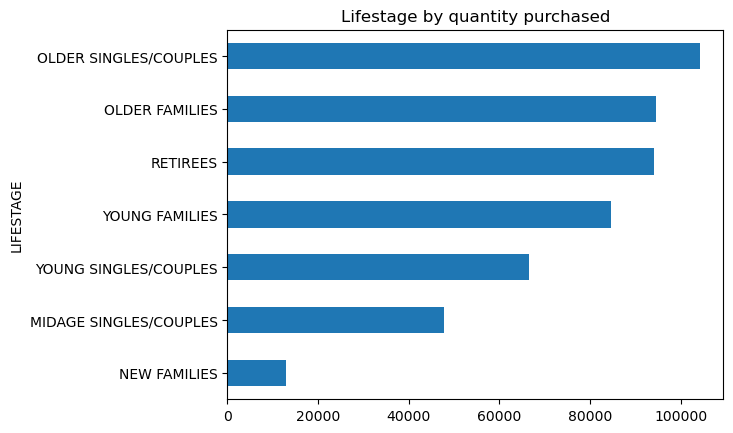

In [114]:
chips_ls_qty=chips_ls["PROD_QTY"].sum()

chips_ls_qty.sort_values().plot(kind='barh')
plt.title("Lifestage by quantity purchased")
plt.show()

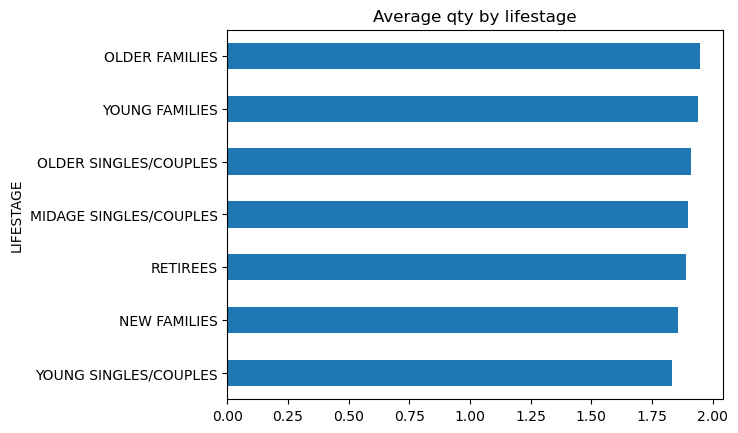

In [115]:
# Lets look at the average by lifestage segment
chips_ls_avg_qty=chips_ls["PROD_QTY"].mean()
chips_ls_avg_sales=chips_ls["TOT_SALES"].mean()

chips_ls_avg_qty.sort_values().plot(kind="barh")
plt.title("Average qty by lifestage")
plt.show()


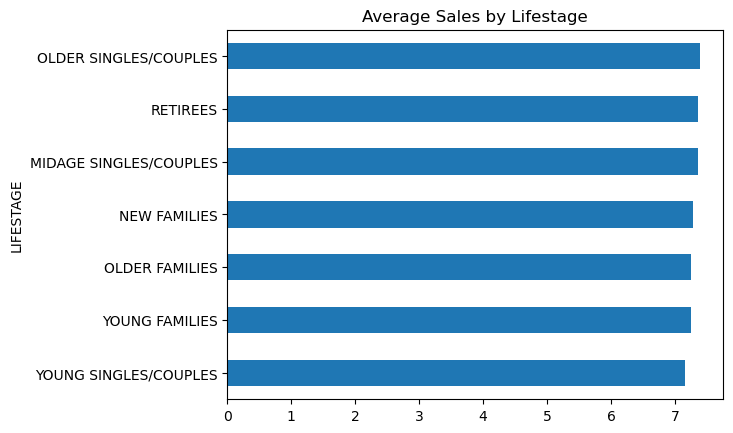

In [116]:
chips_ls_avg_sales.sort_values().plot(kind="barh")
plt.title("Average Sales by Lifestage")
plt.show()

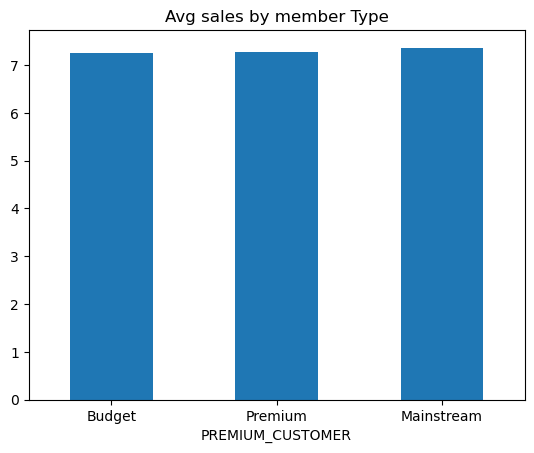

In [117]:
#Cheaking the same for membership type

chips_pt= chips_final.groupby("PREMIUM_CUSTOMER")
chips_pt_avg_qty=chips_pt["PROD_QTY"].mean()
chips_pt_avg_sales=chips_pt["TOT_SALES"].mean()

chips_pt_avg_sales.sort_values().plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Avg sales by member Type")
plt.show()

In [118]:
# cheaking the difference by looking row ways (since the values are close)

chips_pt_avg_sales.round(3)

PREMIUM_CUSTOMER
Budget        7.259
Mainstream    7.361
Premium       7.263
Name: TOT_SALES, dtype: float64

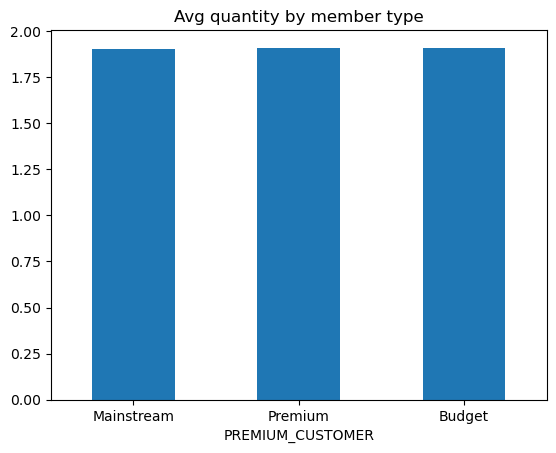

In [119]:
chips_pt_avg_qty.sort_values().plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Avg quantity by member type")
plt.show()

In [120]:
chips_pt_avg_qty.round(3)

PREMIUM_CUSTOMER
Budget        1.910
Mainstream    1.902
Premium       1.906
Name: PROD_QTY, dtype: float64

In [121]:
#Viewing chip sales by premium customer type and brand
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

chips_pt["BRAND"].value_counts()

PREMIUM_CUSTOMER  BRAND     
Budget            Kettle        14154
                  Smiths        11548
                  Doritos        9818
                  Pringles       8620
                  Thins          4931
                  Infuzions      4922
                  RED            4371
                  WW             3881
                  Cobs           3274
                  Tostitos       3236
                  Twisties       3229
                  Old            3203
                  Natural        2246
                  Tyrrells       2195
                  Grain          2114
                  Red            2109
                  CCs            1679
                  Cheezels       1626
                  Woolworths     1605
                  Cheetos        1051
                  Snbts           610
                  Burger          579
                  GrnWves         542
                  French          539
                  NCC             539
                  Sun

In [122]:
#creating pivot table and looking for difference in purchase behavior between brands

customer_type_counts=chips_final["PREMIUM_CUSTOMER"].value_counts()

pivot_table=chips_final.pivot_table(index="PREMIUM_CUSTOMER", columns="BRAND", aggfunc="size", fill_value=0)

# Convert customer_type_counts to numpy array and reshape for broadcasting (i.e., to divide by columns)
customer_type_counts_array= customer_type_counts.to_numpy().reshape(-1,1)

percentage_difference=(pivot_table/ customer_type_counts_array)*100 

#percentage_difference=(pivot_table/ customer_type_counts[:,np.newaxis])*100 (old way of doing it)

percentage_difference

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,GrnWves,Infuzions,Kettle,NCC,Natural,Old,Pringles,RED,Red,Smiths,Snbts,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
PREMIUM_CUSTOMER,,,,,,,,,,,,,,,,,,,,,,,,,,
Budget,0.567714,1.646272,1.030513,1.594305,3.210182,9.626623,0.528494,2.072793,0.531435,4.826058,13.878103,0.528494,2.202220,3.140566,8.451975,4.285798,2.067890,11.322901,0.598110,0.525552,4.834883,3.172922,3.166059,2.152214,3.805350,1.573715
Mainstream,0.588254,1.750808,1.192610,1.862447,4.174673,12.014127,0.544243,2.700817,0.559271,5.957684,17.629378,0.531361,2.320813,3.998626,10.630441,4.622304,2.314373,12.711874,0.583960,0.534581,5.835310,4.011507,4.063033,2.772738,3.849416,1.725045
Premium,0.627072,1.780769,1.097734,1.782204,3.630415,10.238345,0.533800,2.356182,0.581153,5.350916,15.369714,0.552454,2.356182,3.438132,9.440514,4.616224,2.324614,12.100905,0.605548,0.571109,5.320782,3.584497,3.501270,2.387751,4.093903,1.757810


There is not much of a difference from lifestage and member type when it comes to average price and quantity purchased

In [124]:
# doing stat test 
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

import scipy.stats as stats

chips_ls.describe()


STORE_NBR                                           \
                           count        mean        std  min   25%    50%   
LIFESTAGE                                                                   
MIDAGE SINGLES/COUPLES   25110.0  135.664755  76.613509  1.0  71.0  133.0   
NEW FAMILIES              6919.0  133.769475  77.816076  1.0  67.0  131.0   
OLDER FAMILIES           48594.0  134.165000  75.176434  1.0  70.0  128.0   
OLDER SINGLES/COUPLES    54479.0  134.024542  76.438581  1.0  69.0  130.0   
RETIREES                 49763.0  136.159295  77.859231  1.0  70.0  133.0   
YOUNG FAMILIES           43592.0  136.019476  75.474556  1.0  71.0  133.0   
YOUNG SINGLES/COUPLES    36377.0  135.122138  79.344684  1.0  65.0  133.0   

                                     LYLTY_CARD_NBR                 ...  \
                          75%    max          count           mean  ...   
LIFESTAGE                                                           ...   
MIDAGE SINGLES/COUPLES  203.0  272.0        25110.0  136208.697810  ...   
NEW FAMILIES            201.0  272.0         6919.0  133970.287469  ...   
OLDER FAMILIES          199.0  272.0        48594.0  134510.856567  ...   
OLDER SINGLES/COUPLES   201.0  272.0        54479.0  134670.120762  ...   
RETIREES                207.0  272.0        49763.0  136621.915982  ...   
YOUNG FAMILIES          201.0  272.0        43592.0  136382.402551  ...   
YOUNG SINGLES/COUPLES   205.0  272.0        36377.0  135629.000247  ...   

                       PROD_QTY      TOT_SALES                                \
                            75%  max     count      mean       std  min  25%   
LIFESTAGE                                                                      
MIDAGE SINGLES/COUPLES      2.0  5.0   25110.0  7.357678  2.532071  1.5  5.6   
NEW FAMILIES                2.0  5.0    6919.0  7.289124  2.557880  1.5  5.4   
OLDER FAMILIES              2.0  5.0   48594.0  7.253307  2.488841  1.5  5.4   
OLDER SINGLES/COUPLES       2.0  5.0   54479.0  7.386823  2.511223  1.5  5.8   
RETIREES                    2.0  5.0   49763.0  7.364325  2.529464  1.5  5.6   
YOUNG FAMILIES              2.0  5.0   43592.0  7.252709  2.486029  1.5  5.4   
YOUNG SINGLES/COUPLES       2.0  5.0   36377.0  7.158515  2.628117  1.5  5.4   

                                        
                        50%  75%   max  
LIFESTAGE                               
MIDAGE SINGLES/COUPLES  7.4  9.2  29.5  
NEW FAMILIES            7.4  9.2  27.0  
OLDER FAMILIES          7.4  8.8  29.5  
OLDER SINGLES/COUPLES   7.4  9.2  29.5  
RETIREES                7.4  9.2  29.5  
YOUNG FAMILIES          7.4  8.8  29.5  
YOUNG SINGLES/COUPLES   7.4  8.8  27.0  

[7 rows x 48 columns]

In [125]:
# grouping by lifestage

chips_youngfam=chips_final[chips_final["LIFESTAGE"]=="YOUNG FAMILIES"]
chips_young=chips_final[chips_final["LIFESTAGE"]=="YOUNG SINGLES/COUPLES"]

In [126]:
t_statistic,p_value=stats.ttest_ind(chips_youngfam["TOT_SALES"], chips_young["TOT_SALES"])

print("T STAT",t_statistic )
print("P VALUE",p_value )

T STAT 5.1982858323764685
P VALUE 2.0162783045849555e-07


Based on the P value above we can reject the alternative hypothesis. there is no real difference in spending habits between young families and young singles.



In [128]:
# Cheaking for Customer type
chips_prem= chips_final[chips_final["PREMIUM_CUSTOMER"]=="Premium"]
chips_bud=chips_final[chips_final["PREMIUM_CUSTOMER"]=="Budget"]

t_statistic, p_value = stats.ttest_ind(chips_prem["TOT_SALES"], chips_bud["TOT_SALES"])

print("T STAT",t_statistic )
print("P VALUE",p_value )


T STAT 0.3361170557425791
P VALUE 0.736783030336481


Here we can again reject the alternative hypothesis. and conclude there is no significate difference between the customer types

In [130]:
# Now exploring the weights of the bags purchased
chips_final["WEIGHT"].value_counts()

WEIGHT
175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6416
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: count, dtype: int64

In [133]:
chips_final.loc[:, "WEIGHT"] = chips_final["WEIGHT"].astype(str)

# Display the "WEIGHT" column
chips_final["WEIGHT"]


0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264830    175g
264831    170g
264832    150g
264833    175g
264834     nan
Name: WEIGHT, Length: 264835, dtype: object

In [135]:
# creating custom category of chip bag sizes
weight_category_map={'70g':'Extra small',
                     '90g':'Extra small',
                     '110g':'Small',
                     '125g':'Small',
                     '134g':'Small',
                     '135g':'Small',
                     '150g':'Small',
                     '160g':'Small',
                     '165g':'Small',
                     '170g':'Small',
                     '175g':'Small',
                     '180g':'Small',
                     '190g':'Small',
                     '200g':'Medium',
                     '210g':'Medium',
                     '220g':'Medium',
                     '250g':'Medium',
                     '270g':'Medium',
                     '300g':'Large',
                     '330g':'Large',
                     '380g':'Large',
                     'nan':np.nan
                    }

# Creating a new weight column "Weioght_category" by mapping values

chips_final['BAG_SIZE']=chips_final['WEIGHT'].map(weight_category_map)

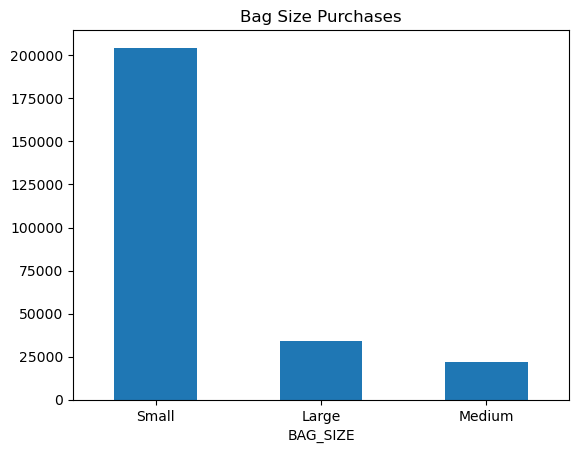

In [141]:
chips_bs=chips_final['BAG_SIZE'].value_counts()

chips_bs.plot(kind='bar')
plt.xticks(rotation=360)
plt.title("Bag Size Purchases")
plt.show()

In [143]:
#Saving

chips_final.to_csv('chips_final.csv')

In [ ]:
#Insights

#Largest customer type is the Mainstream group
#Largest Membership group is the older population
#Top 10 members spent over 120 dollars on chips within a year
#Top 4 brands sold are : Doritos, Smiths, Pringles and Kettle
#Older individuals purchased the most chips which includes single 
        #individuals and families. New families purchased the least on chips
#There doesn't apper to be any statistical difference with purchase
        #prices with customer in either life stage or membership type
#The most purchased sized chips were the samll bags and then 
        #large bags. The commmon medium sized bags and extra samll were sold the least